## Observations and Insights 

In [1]:
#Analysis
#- Capomulin and Ramicane seem to show the most promise of the treatments most obviously in the boxplot, and given the mean 
#    tumor volume indication that Capomulin, Ramicane, Infubinol and Ceftamin were the most promising four
#- The subjects in the study seem to be balanced, ie the male:female ratio is almost 1:1, each drug regimen was tested 
#    on almost the exact same amount of mice
#- The Timepoint duplication and lack of a complete set of Timepoints for some mice makes the data a little hard to clean,
#    and the mice whose first/second/third measure was their last add little value to the dataset. No data is perfect though

In [2]:
#NOTE: 
# This was the first instruction as posted in gitlab:
#    'Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.'
# I followed the approach Dr. A gave us until Box Plots. He did not start this way in the first cell, he followed the 
#   instructions pasted in the first several cells. We ended up with data cleaned this way, but not until 'Quartiles, 
#   Outliers and Boxplots', where we took over. Please understand that up until that point EVERYTHING in this HW was given to
#   us verbatum in class, so the approach was not chosen by us. I added my own explanatory comments though. Perhaps some people 
#   ignored this free HW and built theirs from scratch, but I will definitely be questioning and upset if what was given to us 
#   verbatum by Dr. A is not acceptable. I tried to ensure success by matching all of my output exactly to the starter file given to us.

In [3]:
#import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np


#get study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


#read the study data

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


#combine the data into a single dataset

study_data_complete = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')


#display the data table for preview

study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
#checking the number of mice

len(study_data_complete['Mouse ID'].unique())

249

In [7]:
#getting the duplicate mouse by ID number that shows up for Mouse ID and Timepoint 

duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']

#create new DataFrame, rename column for display
duplicates_df = pd.DataFrame(duplicate_mouse_ids)
duplicates_df = duplicates_df.rename(columns={'Mouse ID':'Duplicates of Mouse ID'})

duplicates_df


,Duplicates of Mouse ID
137,g989
360,g989
681,g989
869,g989
1111,g989


In [8]:
#get all the data for the duplicate mouse ID, set index to Mouse ID 

study_data_complete.loc[study_data_complete['Mouse ID'] == 'g989'].set_index('Mouse ID')


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [9]:
#create a clean DataFrame by dropping the duplicate mice by their IDs

study_data_clean = study_data_complete.drop_duplicates('Mouse ID')
study_data_clean.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [10]:
#checking the number of mice in the clean DataFrame

len(study_data_clean['Mouse ID'])

249

## Summary Statistics

In [11]:
#generate a summary statistics table of mean, median, variance, standard deviation, 
#  and SEM of the tumor volume for each drug regimen

tumor_volume = study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

mean_tumor_volume = tumor_volume.mean()
median_tumor_volume = tumor_volume.median()
var_tumor_volume = tumor_volume.var()
std_tumor_volume = tumor_volume.std()
sem_tumor_volume = tumor_volume.sem()

drug_tumor_df = pd.DataFrame({
   'Mean Tumor Volume':mean_tumor_volume,
   'Median Tumor Volume':median_tumor_volume,
   'Var Tumor Volume':var_tumor_volume,
   'Std Tumor Volume':std_tumor_volume,
   'SEM Tumor Volume':sem_tumor_volume, 
})

drug_tumor_df.head(20)


,Mean Tumor Volume,Median Tumor Volume,Var Tumor Volume,Std Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
#using the aggregation method, produce the same summary statistics in a single line

drug_tumor_df = study_data_complete.groupby('Drug Regimen').agg(Mean_Tumor_Volume = ('Tumor Volume (mm3)', np.mean),
Median_Tumor_Volume = ('Tumor Volume (mm3)', np.median),
Variance_Tumor_Volume = ('Tumor Volume (mm3)', np.var),
Stdev_Tumor_Volume = ('Tumor Volume (mm3)', np.std),
SEM_Tumor_Volume = ('Tumor Volume (mm3)', stats.sem))
drug_tumor_df.head()

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stdev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [13]:
#total number of measurements taken on each drug regimen using unique Mouse ID at 0 Timepoint using pandas,
#  this corresponds to the number of mice in each regimen

measures_per_drug = study_data_clean['Drug Regimen'].value_counts()
drug_measures_df = pd.DataFrame({'Mice Count':measures_per_drug})

#on one version of HW instructions this was requested here, list of unique treatments
unique_drugs = study_data_complete['Drug Regimen'].unique()

drug_measures_df.head(20)




,Mice Count
Capomulin,25
Placebo,25
Infubinol,25
Propriva,25
Zoniferol,25
Ceftamin,25
Ketapril,25
Ramicane,25
Naftisol,25
Stelasyn,24


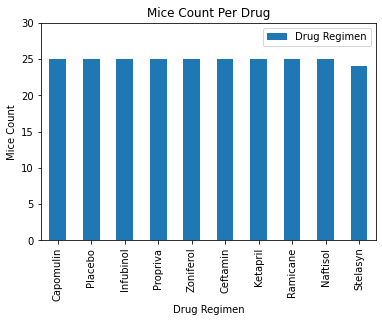

In [14]:
#bar plot showing the total number of measurements taken on each drug regimen at 0 Timepoint using pandas,
#  aka mouse count per regimen

bar_chart = drug_measures_df.plot.bar(title='Mice Count Per Drug', ylim=(0,30), xlabel='Drug Regimen', ylabel='Mice Count', align='center')
bar_chart.legend(['Drug Regimen'])


<BarContainer object of 10 artists>

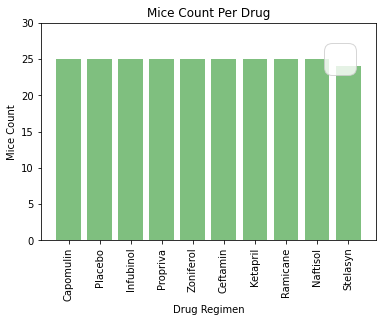

In [15]:
#bar plot showing the total number of mice on each drug regimen as above but using pyplot

x_axis = study_data_clean['Drug Regimen'].value_counts().keys()
y_axis = measures_per_drug

plt.xticks(rotation=90)
plt.title('Mice Count Per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')

#cannot get legend to show, but there was no legend on the sample
plt.legend(['Drug Regimen'], loc='best', fontsize=40)
plt.ylim(0,30)
plt.bar(x_axis, y_axis, color='green', alpha=0.5, align='center')



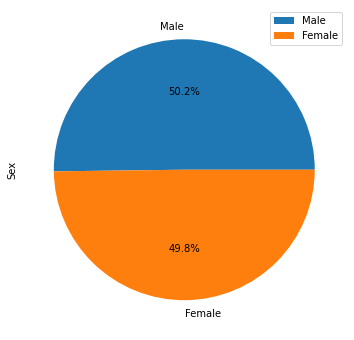

In [16]:
#pie plot showing the distribution of female versus male mice using pandas

pie_plot_df = pd.DataFrame(study_data_clean['Sex'].value_counts())
plot = pie_plot_df.plot.pie(subplots=True, figsize=(6, 6), autopct='%1.1f%%')



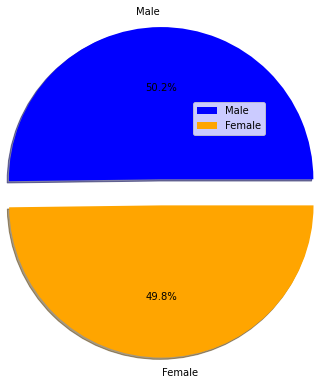

In [17]:
#pie plot showing the distribution of female versus male mice using pyplot
#exploding and shadowing for fun

values = study_data_clean['Sex'].value_counts() 
labels = study_data_clean['Sex'].value_counts().keys()
colors = ['blue', 'orange']
explode = [0.3, 0]


plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, radius=1.75)
plt.legend(study_data_clean['Sex'].value_counts().keys())
plt.legend(loc='best')
plt.show()
 


## Quartiles, Outliers and Boxplots

In [18]:
#final tumor volume of each mouse across four of the treatment regimens:  
#  Capomulin, Ramicane, Infubinol, and Ceftamin


#drop duplications of Mouse ID/Timepoint pairs
study_data_clean_too = study_data_complete.drop_duplicates({'Mouse ID', 'Timepoint'})

#isolate the maximum Timepoints measured
max_timepoints = pd.DataFrame(study_data_clean_too.groupby(['Mouse ID'])['Timepoint'].max())

#merge max Timepoints with cleaned df to get all column values for max Timepoints
max_timepoints_merge = max_timepoints.merge(study_data_clean_too, on=['Mouse ID', 'Timepoint'], how='left')

#locate just the 4 drugs of interest
study_data_4drugs = max_timepoints_merge.loc[(max_timepoints_merge['Drug Regimen'] == 'Capomulin') | (max_timepoints_merge['Drug Regimen'] == 'Ramicane')
                                       | (max_timepoints_merge['Drug Regimen'] == 'Infubinol') | (max_timepoints_merge['Drug Regimen'] == 'Ceftamin'), :]

#make timepoint ascending, set index to Mouse ID
study_data_4drugs = study_data_4drugs.sort_values('Timepoint')
study_data_4drugs = study_data_4drugs.set_index('Mouse ID')

#reorder columns to match example
study_data_4drugs = study_data_4drugs[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Sex', 
                                       'Age_months', 'Weight (g)']]
study_data_4drugs.head(20)



,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
t573,Ceftamin,0,45.000000,0,Female,15,27
u153,Ceftamin,0,45.000000,0,Female,11,25
x226,Ceftamin,0,45.000000,0,Male,23,28
b447,Ceftamin,0,45.000000,0,Male,2,30
v339,Infubinol,5,46.250112,0,Male,20,26
m756,Infubinol,5,47.010364,1,Male,19,30
h531,Ceftamin,5,47.784682,0,Male,5,27
w678,Ramicane,5,43.166373,0,Female,5,24
c326,Infubinol,5,36.321346,0,Female,18,25


In [26]:
#locate the rows which contain mice on each drug and get the tumor volumes

#use df produced by loc on 4 drugs of interest
mouse_drug_and_volume = study_data_4drugs.iloc[:, [0, 2]]
mouse_drug_and_volume

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
t573,Ceftamin,45.000000
u153,Ceftamin,45.000000
x226,Ceftamin,45.000000
b447,Ceftamin,45.000000
v339,Infubinol,46.250112
...,...,...
j119,Capomulin,38.125164
i738,Capomulin,37.311846
i557,Capomulin,47.685963


In [30]:
#calculate the IQR and quantitatively determine if there are any potential outliers
#determine outliers using upper and lower bounds
     
quartiles = study_data_4drugs['Tumor Volume (mm3)'].quantile([.25,.5,.75, 1]) #.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[1] #0.75
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 72.2267309
The interquartile range of Tumor Volume is: 35.03898709750001
The the median of Tumor Volume is: 45.0 
Values below -15.370736843750024 could be outliers.
Values above 124.78521154625003 could be outliers.


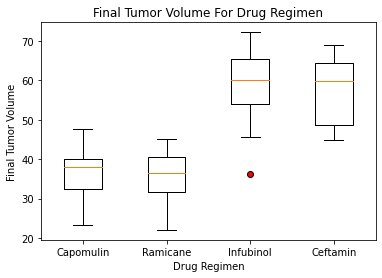

In [21]:
#box plot of the final tumor volume of each mouse across four regimens of interest

#for loop using loc on 4 drugs that returns volume, to get final volumes in a list to plot
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []
for drug in treatment_list:
    final_tumor_vol = study_data_4drugs.loc[study_data_4drugs["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)

#use subplots() so we get 4 sets of values in one boxplot, one per drug
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume For Drug Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel('Drug Regimen')

#flierprops to color the outliers
ax1.boxplot(tumor_vol_list, labels=treatment_list, flierprops=dict(markerfacecolor='red'))
plt.show()



## Line and Scatter Plots

In [22]:
#isolated view of just capomulin for later use

study_data_capomulin = study_data_clean_too.loc[(study_data_clean_too['Drug Regimen'] == 'Capomulin')]
study_data_capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


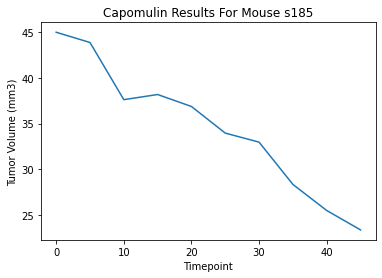

In [23]:
#line plot of tumor volume vs. time point for mouse s185 treated with Capomulin

#use loc to return Timepoints and Tumor Volumes for just s185
x_axis_data = study_data_capomulin.loc[study_data_capomulin['Mouse ID'] == 's185', 'Timepoint']
y_axis_data = study_data_capomulin.loc[study_data_capomulin['Mouse ID'] == 's185', 'Tumor Volume (mm3)']
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Results For Mouse s185')

#plot the data loc returned
plt.plot(x_axis_data, y_axis_data)

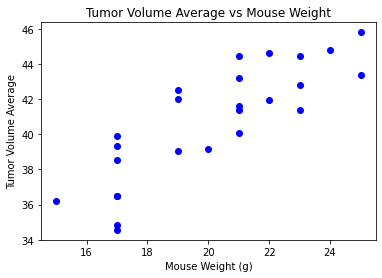

In [24]:
#scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#empty lists to hold (x, y) values
avg_tumor_volumes = []
weights = []

#append averages
for weight in (study_data_capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()):
    weights.append(weight)
    
for volume in (study_data_capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()):    
    avg_tumor_volumes.append(volume)
    
plt.xlabel('Average Mouse Weight (g)')
plt.ylabel('Tumor Volume Average')
plt.title('Average Tumor Volume vs Mouse Weight')    
plt.scatter(weights, avg_tumor_volumes, marker='o', facecolors='blue', edgecolors='blue')



## Correlation and Regression

The St. Pearson Correlation Coefficient between both factors is 0.84


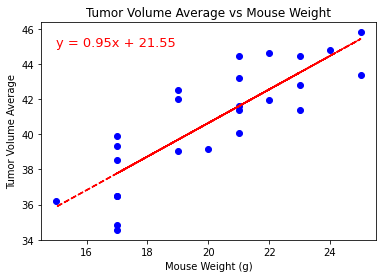

In [25]:
#calculate the St. Pearson correlation coefficient and linear regression model for mouse weight and average tumor volume 
#  for the Capomulin regimen 
#scatter plot of the data

#get regression stats, print r
slope, intercept, rValue, pValue, std_err = stats.linregress(weights, avg_tumor_volumes)
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')

#compose line of best fit (regression line) according to "y = mx + b"
line_best_fit = slope*(study_data_capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()) + intercept


annotation_string = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(annotation_string, xy=(15,45), fontsize=13, color='red')
plt.plot(weights,line_best_fit,"--", color='red')
plt.xlabel('Average Mouse Weight (g)')
plt.ylabel('Tumor Volume Average')
plt.title('Average Tumor Volume vs Mouse Weight')

plt.scatter(weights, avg_tumor_volumes, marker='o', facecolors='blue', edgecolors='blue')
plt.show()
